In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Import train and test sets
train = pd.read_csv('../Data/training_set.csv', index_col = 0)
test = pd.read_csv('../Data/test_set.csv', index_col = 0)

In [6]:
train.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,des_sent_mag,des_sent_score,named,mixed_breed,mixed_color
0,2,nibble,3,299,0,1,1,7,0,1,...,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2,2.4,0.3,1,0,1
1,2,no name yet,1,265,0,1,1,2,0,2,...,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0,0.7,-0.2,0,0,1
2,1,brisco,1,307,0,1,2,7,0,2,...,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3,3.7,0.2,1,0,1
3,1,miko,4,307,0,2,1,2,0,2,...,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2,0.9,0.9,1,0,1
4,1,hunter,1,307,0,1,1,0,0,2,...,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2,3.7,0.6,1,0,0


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14993 entries, 0 to 14992
Data columns (total 29 columns):
Type              14993 non-null int64
Name              14993 non-null object
Age               14993 non-null int64
Breed1            14993 non-null int64
Breed2            14993 non-null int64
Gender            14993 non-null int64
Color1            14993 non-null int64
Color2            14993 non-null int64
Color3            14993 non-null int64
MaturitySize      14993 non-null int64
FurLength         14993 non-null int64
Vaccinated        14993 non-null int64
Dewormed          14993 non-null int64
Sterilized        14993 non-null int64
Health            14993 non-null int64
Quantity          14993 non-null int64
Fee               14993 non-null int64
State             14993 non-null int64
RescuerID         14993 non-null object
VideoAmt          14993 non-null int64
Description       14981 non-null object
PetID             14993 non-null object
PhotoAmt          14993 non-n

In [7]:
test.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,RescuerID,VideoAmt,Description,PetID,PhotoAmt,des_sent_mag,des_sent_score,named,mixed_breed,mixed_color
0,1,Puppy,2,307,0,1,1,0,0,2,...,4475f31553f0170229455e3c5645644f,0,"Puppy is calm for a young dog, but he becomes ...",378fcc4fc,3.0,1.5,0.7,1,0,0
1,2,London,24,266,0,1,2,7,0,2,...,4475f31553f0170229455e3c5645644f,0,Urgently seeking adoption. Please contact for ...,73c10e136,1.0,0.0,0.0,1,0,1
2,2,Snowball,20,266,0,2,7,0,0,2,...,4475f31553f0170229455e3c5645644f,0,Snowball... doesn't look so good (she is healt...,72000c4c5,1.0,1.5,0.1,1,0,0
3,2,Malibu,5,266,252,2,1,6,7,2,...,4475f31553f0170229455e3c5645644f,0,"Malibu: Female, Local Mix, 4-5 months, vaccina...",e147a4b9f,1.0,2.2,0.3,1,1,1
4,1,Lala Girl,6,307,0,2,1,2,7,2,...,4475f31553f0170229455e3c5645644f,0,LALA! That's my name. I'm a 6 month old girl d...,43fbba852,1.0,1.1,0.2,1,0,1


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3948 entries, 0 to 3947
Data columns (total 28 columns):
Type              3948 non-null int64
Name              3948 non-null object
Age               3948 non-null int64
Breed1            3948 non-null int64
Breed2            3948 non-null int64
Gender            3948 non-null int64
Color1            3948 non-null int64
Color2            3948 non-null int64
Color3            3948 non-null int64
MaturitySize      3948 non-null int64
FurLength         3948 non-null int64
Vaccinated        3948 non-null int64
Dewormed          3948 non-null int64
Sterilized        3948 non-null int64
Health            3948 non-null int64
Quantity          3948 non-null int64
Fee               3948 non-null int64
State             3948 non-null int64
RescuerID         3948 non-null object
VideoAmt          3948 non-null int64
Description       3946 non-null object
PetID             3948 non-null object
PhotoAmt          3948 non-null float64
des_sent_mag 

In the *Feature_Engineering* notebook, new columns like ``named``, ``mixed_breed``, and ``mixed_color`` were added to simplify and condense multiple columns. Therefore the columns like ``Name``, ``Breed1``, ``Breed2``, etc. can be removed since they're correlated to each other.

In [10]:
# Create list of columns to be removed
remove_cols = ['Name', 'Breed1', 'Breed2', 'Color1', 'Color2', 'Color3', 'Description']

In [12]:
# Remove columns from train and test sets
train_removed = train.drop(remove_cols, axis = 1)
test_removed = test.drop(remove_cols, axis = 1)

## A Brief Look at ``RescuerID``

Other columns like ``RescuerID`` and ``PetID`` should also be removed before further analysis since identifiers like these should be independent of how quickly a pet is adopted. However, ``RescuerID`` is interesting because some rescuers could be better at documenting pets than others, offering more insight and better descriptions of the pets they list. Quickly looking at the statistics of ``RescuerID`` could help determine if this column is relevant.

In [26]:
# Get count of the number of rescuers
train_rescuers = train_removed['RescuerID'].unique()

print('Number of unique rescuers in train: %d' % len(train_rescuers))

Number of unique rescuers in train: 5595


In [41]:
# Aggregate des_sent_mag and des_sent_score by RescuerID
rescuers = train_removed.groupby('RescuerID')['AdoptionSpeed', 'des_sent_mag', 'des_sent_score', 'PetID'].agg({'PetID':'count',
                                                                                                               'AdoptionSpeed':'mean',
                                                                                                               'des_sent_mag':'mean',
                                                                                                               'des_sent_score':'mean'})

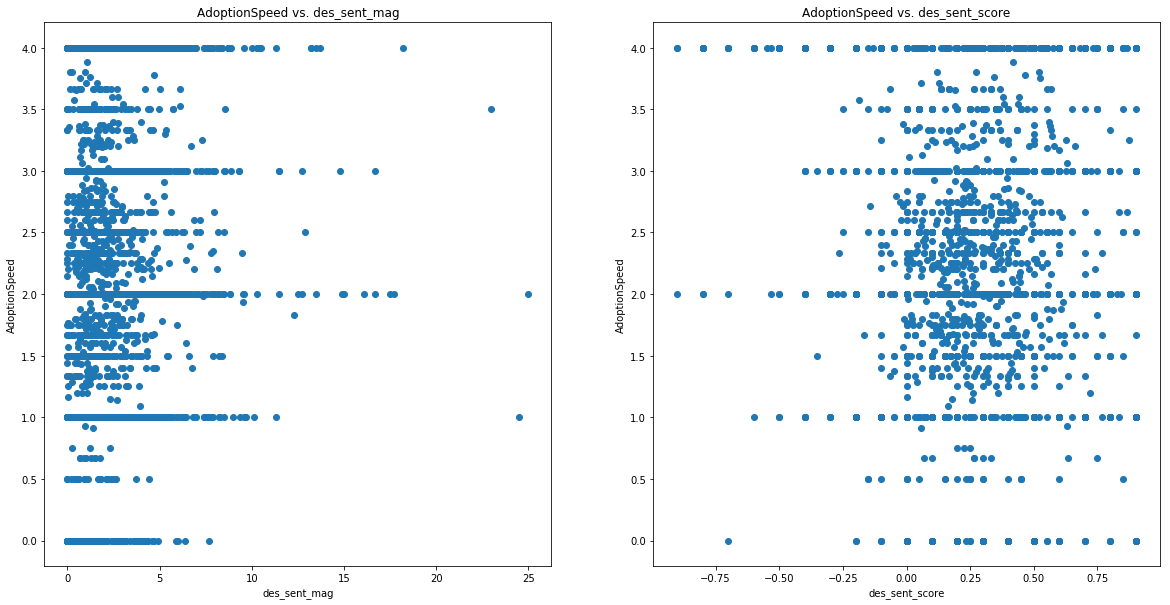

In [47]:
_ = plt.figure(figsize=(20, 10))
_ = plt.subplot(1, 2, 1)
_ = plt.scatter(rescuers['des_sent_mag'], rescuers['AdoptionSpeed'])
_ = plt.title('AdoptionSpeed vs. des_sent_mag')
_ = plt.xlabel('des_sent_mag')
_ = plt.ylabel('AdoptionSpeed')

_ = plt.subplot(1, 2, 2)
_ = plt.scatter(rescuers['des_sent_score'], rescuers['AdoptionSpeed'])
_ = plt.title('AdoptionSpeed vs. des_sent_score')
_ = plt.xlabel('des_sent_score')
_ = plt.ylabel('AdoptionSpeed')

In [49]:
rescuers.corr()

,PetID,AdoptionSpeed,des_sent_mag,des_sent_score
PetID,1.000000,-0.035519,-0.001816,-0.001247
AdoptionSpeed,-0.035519,1.000000,-0.044734,0.029720
des_sent_mag,-0.001816,-0.044734,1.000000,0.064016
des_sent_score,-0.001247,0.029720,0.064016,1.000000


Based on these plots and the correlation between ``AdoptionSpeed`` and the two description quantities, it doesn't seem to matter who posts the pets when it comes to ``AdoptionSpeed``. That means both ``RescuerID`` and ``PetID`` can be removed from the training and test sets.

In [50]:
# Remove RescuerID and PetID from train and test set
train_new = train_removed.drop(['RescuerID', 'PetID'], axis = 1)
test_new = test_removed.drop(['RescuerID', 'PetID'], axis = 1)

In [ ]:
# One hot encode State
# Scale data

# Machine Learning Algorithms

Now that the data is in a favorable format, the next step is to determine which model best suits the needs of the problem. 